# Introduzione all'inferenza frequentista {#sec-intro-frequentist-inference}

**Prerequisiti**

**Concetti e Competenze Chiave**

- Comprendere il background storico da cui si è sviluppato l'approccio frequentista.
- Comprendere il concetto di distribuzione campionaria.
- Familiarizzare con le proprietà della distribuzione campionaria della media dei campioni.
- Comprendere il teorema del limite centrale.
- Acquisire conoscenze sulle proprietà della distribuzione campionaria della varianza.

**Preparazione del Notebook**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import math
import arviz as az
import itertools

In [2]:
seed: int = sum(map(ord, "frequentist_approach"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Ci sono due approcci principali per l'inferenza statistica: la statistica frequentista e la statistica bayesiana. Questi metodi consentono di fare conclusioni sulla popolazione di interesse attraverso l'analisi dei dati. Entrambi gli approcci sono usati per stimare quantità sconosciute, fare previsioni e testare ipotesi, ma differiscono nella loro interpretazione della probabilità e in come integrano le conoscenze precedenti ed evidenze.

Nella statistica frequentista, la probabilità viene interpretata come la frequenza relativa a lungo termine di un evento in un numero infinito di prove. Questo approccio si basa sull'idea che il vero valore di un parametro della popolazione sia fisso, ma sconosciuto e debba essere stimato dai dati. In questo contesto, le inferenze statistiche vengono ottenute a partire dai dati osservati, mediante l'utilizzo di tecniche come la stima puntuale, gli intervalli di confidenza e il test di ipotesi, e facendo alcune assunzioni riguardo al processo sottostante che genera i dati.

D'altra parte, la statistica bayesiana interpreta la probabilità come una misura di convinzione o grado di certezza riguardo a un evento [@jaynes2003probability]. Questo approccio consente di incorporare conoscenze pregresse ed evidenze nell'analisi statistica attraverso l'uso del teorema di Bayes. In questo contesto, il vero valore di un parametro della popolazione è trattato come una variabile casuale e viene continuamente aggiornato man mano che vengono raccolti nuovi dati. Ciò porta alla formazione di una distribuzione completa nello spazio dei parametri, nota come distribuzione a posteriori, che può essere utilizzata per fare previsioni probabilistiche e quantificare l'incertezza associata.

In questo capitolo, approfondiremo il concetto di *distribuzione campionaria* che costituisce uno dei pilastri dell'inferenza statistica frequentista. La distribuzione campionaria ci permette di comprendere come le stime dei parametri della popolazione, come la media o la varianza, cambiano da campione a campione. In particolare, la distribuzione campionaria ci consente di stabilire delle proprietà probabilistiche delle stime campionarie, come ad esempio la loro media e la loro varianza. Queste proprietà sono utili per costruire gli intervalli di fiducia e i test di ipotesi che costituiscono gli strumenti principali dell'inferenza statistica frequentista.

## I Frequentisti sono Razzisti?

Nel @sec-bayes_theorem, abbiamo esaminato le origini storiche e il contesto culturale che ha contribuito all'interpretazione applicativa del teorema di Bayes fornita da Richard Price. Queste origini sono legate alle idee alla base della rivoluzione americana, rappresentando quello che potremmo definire il "lato luminoso" del liberalismo moderno.

Le origini culturali dell'approccio frequentista, invece, sono diametralmente opposte e strettamente connesse a quella che potremmo chiamare la "parte oscura" della modernità. Si potrebbe dire che l'avversione per la soggettività abbia guidato l'ascesa del frequentismo.

Francis Galton (1822-1911) fu un uomo straordinario sotto molti aspetti. Cugino di Charles Darwin e medico qualificato, ereditò una fortuna che gli permise di dedicarsi liberamente ai suoi interessi. Esplorò l'Africa, ricevendo una medaglia dalla Royal Geographical Society, e diede un importante contributo alla meteorologia, notando per primo il fenomeno degli "anticicloni". Tuttavia, il suo contributo più significativo riguardò l'uso della statistica nello studio degli esseri umani, in particolare nell'analisi della trasmissione ereditaria del talento.

Galton trascorse gran parte della sua carriera all'University College di Londra, dove fece numerose scoperte. Tra queste, un importante contributo riguardava la distribuzione normale. Fu anche il primo a spiegare il concetto che oggi conosciamo come "regressione verso la media", da lui chiamato "regressione verso la mediocrità".

Il suo interesse per l'ereditarietà del talento lo portò a scrivere il libro "Hereditary Genius", in cui esaminava come i pensatori brillanti spesso si concentrassero in determinate famiglie. Coniò l'espressione "nature and nurture" per riferirsi ai due fattori che influenzano lo sviluppo umano: l'ereditarietà (quello che oggi chiamiamo genetica) e l'ambiente.

Tuttavia, Galton non si limitò a osservare e documentare fatti sulla distribuzione dell'intelligenza. Il suo obiettivo era creare una scienza dell'allevamento umano, che egli denominò "eugenetica". Egli sosteneva l'incoraggiamento della riproduzione tra le famiglie di maggior successo e lo scoraggiamento tra quelle meno fortunate.

Galton era anche estremamente razzista. In una lettera al Times di Londra, definì gli africani "inferiori" e "selvaggi pigri e chiacchieroni", descrisse gli arabi come "poco più che consumatori della produzione altrui" e sostenne che l'Africa orientale dovesse essere consegnata ai cinesi, poiché questi, nonostante fossero "inclini alla menzogna e alla servilità", erano per natura "industriosi e amanti dell'ordine". Per Galton, gli anglosassoni erano la migliore razza esistente, sebbene ritenesse che gli antichi ateniesi fossero stati i migliori di tutti i tempi.

Il lavoro di Galton ispirò una generazione successiva di statistici, in particolare Karl Pearson (1857-1936) e Ronald Fisher (1890-1962). Come Galton, Fisher e Pearson erano brillanti, ma condividevano anche le sue idee razziste, considerate inaccettabili sia per gli standard attuali che per quelli del loro tempo.

Karl Pearson, un poliedrico studioso, divenne professore di matematica applicata all'UCL nel 1885, seguendo le orme di Galton. Alla morte di quest'ultimo, ereditò la cattedra di eugenismo finanziata da Galton stesso. Pearson fondò la rivista di statistica "Biometrika" e sviluppò il test del chi quadrato, oltre a coniare il termine "deviazione standard".

Ronald Fisher, più giovane, succedette a Pearson come professore di eugenismo all'UCL. Fisher è considerato un gigante della teoria statistica, avendo inventato o esteso numerosi strumenti statistici moderni, tra cui l'analisi della varianza (ANOVA), il concetto di "significatività statistica" e il metodo della massima verosimiglianza (MLE).

Tutti questi ricercatori cercarono di allontanare la statistica dall'approccio soggettivo di Laplace e Bayes. Come Galton, sia Pearson che Fisher erano convinti sostenitori dell'eugenismo.

È interessante chiedersi se le idee di Galton, Pearson e Fisher sull'eugenismo abbiano influenzato le loro visioni scientifiche. Secondo alcuni studiosi, la storia della statistica e dell'eugenismo sono strettamente intrecciate. Fisher e, in misura minore, Pearson respingevano l'idea del bayesianesimo perché cercavano di assegnare un fondamento "oggettivo" alle loro idee eugenetiche. Se fosse stata la scienza a stabilire che alcune razze erano inferiori e altre superiori, o che si dovesse scoraggiare la riproduzione tra i poveri, allora queste idee sarebbero state incontestabili. Il bayesianesimo, con la sua intrinseca soggettività, minava questa pretesa di oggettività.

Quanto di tutto ciò dobbiamo tenere a mente quando esaminiamo la statistica frequentista? @chivers2024everything risponde in questo modo. È certo che parte dell'ideologia razziale nazista può essere ricondotta senza troppe difficoltà a Galton. Tuttavia, questa considerazione, per quanto estremamente importante dal punto di vista storico ed etico, non è direttamente rilevante in ambito statistico. La domanda cruciale in termini statistici rimane: "Quale approccio è corretto?" o, più accuratamente, "Quale è più utile?", piuttosto che "Quale ha avuto i sostenitori più disgustosi?".

D'altra parte, personalmente ritengo che la risposta di @chivers2024everything sia fondamentalmente inadeguata. Consideriamo uno scenario ipotetico: all'interno di una "torre d'avorio" - che sia la statistica, l'accademia o la scienza in generale - la teoria A si dimostra più efficace della teoria B. Tuttavia, al di fuori di questo ambito ristretto, la teoria A, a differenza della B, comporta implicazioni etiche inaccettabili. 

Dobbiamo davvero accettare A solo perché funziona meglio all'interno di questo microcosmo artificiale? Assolutamente no.

Innanzitutto, le cosiddette "torri d'avorio" sono mere costruzioni ideologiche. Non esiste una vera demarcazione tra "dentro" e "fuori" questi ambiti. La scienza e l'etica non operano in compartimenti stagni, ma si influenzano reciprocamente in un continuo dialogo.

Inoltre, nel caso specifico del frequentismo, è evidente - come dimostreremo in seguito - che questo metodo è intrinsecamente fallace, indipendentemente dal contesto in cui lo si applichi. La sua presunta efficacia all'interno di un ambito ristretto è illusoria e non giustifica in alcun modo le sue implicazioni problematiche. Non possiamo e non dobbiamo separare l'efficacia teorica dalle conseguenze pratiche ed etiche. Il frequentismo fallisce non solo sul piano morale, ma anche su quello scientifico, rendendo la sua difesa insostenibile su tutti i fronti.

## Stime, stimatori e parametri

Spostiamo ora il discorso da un piano culturale ad un piano strettamente statistico. Consideriamo il concetto di *stima statistica*.

Quando si analizzano i dati, solitamente si è interessati a una quantità a livello di popolazione; tuttavia, di solito si ha accesso solo a un campione di osservazioni. La quantità sconosciuta di nostro interesse viene chiamata *parametro*. La statistica che calcoliamo utilizzando i dati del campione viene chiamata *stima*, e la formula che la produce viene chiamata *stimatore*. Formalmente, uno stimatore è una funzione dei dati osservati utilizzata per produrre una stima di un parametro.

In altre parole, quando analizziamo un campione di dati, vogliamo inferire alcune proprietà della popolazione di cui il campione è rappresentativo. Il parametro rappresenta la misura di tali proprietà, ma spesso non è possibile calcolarlo direttamente sulla popolazione. Pertanto, lo stimiamo utilizzando le osservazioni del campione. La stima è quindi l'approssimazione del valore del parametro che otteniamo dal nostro campione, mentre lo stimatore è la formula matematica utilizzata per calcolare questa stima.

Tuttavia, le stime non sono necessariamente identiche ai parametri di nostro interesse. Le stime presentano una certa incertezza dovuta alla variabilità del campionamento. In questo capitolo esamineremo come l'approccio frequentista quantifica l'incertezza nelle nostre stime, in modo da poter trarre conclusioni sul parametro.

## Distribuzione campionaria

In questo capitolo, affronteremo il problema dell'utilizzo della media di un campione casuale per stimare il parametro $\mu$ corrispondente alla media della popolazione da cui è stato estratto il campione. Per caratterizzare l'incertezza della stima di un parametro, l'approccio frequentista utilizza lo strumento statistico della *distribuzione campionaria*.

Per comprendere il concetto di distribuzione campionaria, considereremo il caso di una popolazione finita di dimensioni ridotte. Tuttavia, le stesse proprietà che esamineremo si applicano alle popolazioni di qualsiasi dimensione.

In questa simulazione, ipotizziamo la seguente popolazione:

In [4]:
x = np.array([2, 4.5, 5, 5.5])
print(x)

[2.  4.5 5.  5.5]


L'istogramma sottostante descrive la distribuzione di frequenza della popolazione.

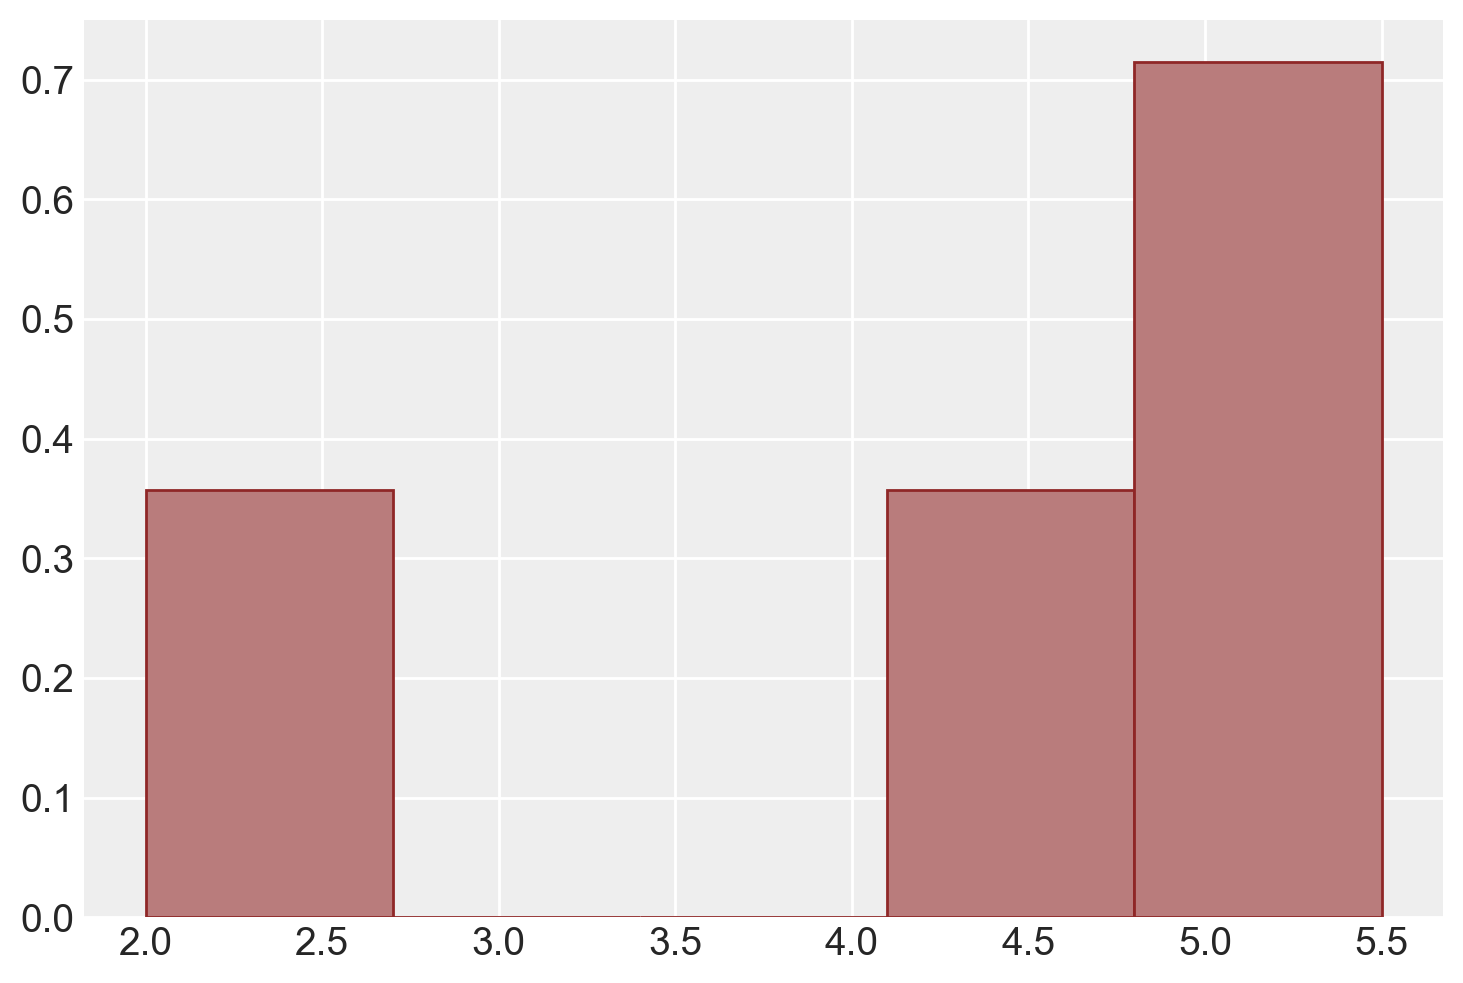

In [5]:
color_fill = "#b97c7c"
color_edge = "#8f2727"
plt.hist(
    x,
    bins=5,
    density=True,
    color=color_fill,
    edgecolor=color_edge,
)
plt.show()

Calcoliamo la media e la varianza della popolazione.

In [6]:
(np.mean(x), np.var(x, ddof=0))

(4.25, 1.8125)

Prendiamo ora in considerazione l'estrazione di tutti i campioni possibili di dimensione $n$ = 2 dalla popolazione. 

In [7]:
# Create an array with all the pairs of possible values
samples = np.array(list(itertools.product(x, repeat=2)))
print(samples)

[[2.  2. ]
 [2.  4.5]
 [2.  5. ]
 [2.  5.5]
 [4.5 2. ]
 [4.5 4.5]
 [4.5 5. ]
 [4.5 5.5]
 [5.  2. ]
 [5.  4.5]
 [5.  5. ]
 [5.  5.5]
 [5.5 2. ]
 [5.5 4.5]
 [5.5 5. ]
 [5.5 5.5]]


Per ottenere un array con tutte le possibili coppie di valori estratti dall'array `x`, possiamo utilizzare la funzione `product` del modulo `itertools`. Impostiamo l'argomento `repeat` a 2 per indicare che vogliamo coppie di valori. Successivamente, convertiamo la lista di tuple risultante in un array NumPy utilizzando la funzione `np.array`, e infine stampiamo il risultato. L'output ottenuto sarà un array con 16 righe e 2 colonne, che rappresenta tutte le possibili coppie di valori che possono essere estratti dall'array `x`.

Calcoliamo il numero totale di campioni di ampiezza $n$ = 2.

In [8]:
len(list(itertools.product(x, x)))

16

Ora procediamo al calcolo della media per ciascun campione. Questo insieme di valori rappresenta la *distribuzione campionaria* delle medie dei campioni con dimensione $n=2$ che possono essere estratti dalla popolazione `x`.

In [9]:
# Create an array with the mean of each sample
means = np.mean(samples, axis=1)
print(means)

[2.   3.25 3.5  3.75 3.25 4.5  4.75 5.   3.5  4.75 5.   5.25 3.75 5.
 5.25 5.5 ]


Per calcolare la media di ogni campione di ampiezza $n=2$, utilizziamo la funzione `mean` del modulo NumPy e la applichiamo lungo l'asse delle colonne dell'array di coppie di valori. In questo modo otteniamo un array unidimensionale contenente la media di ciascuna coppia di valori. 

Una rappresentazione grafica della distribuzione campionaria dei campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x` è fornita qui sotto.

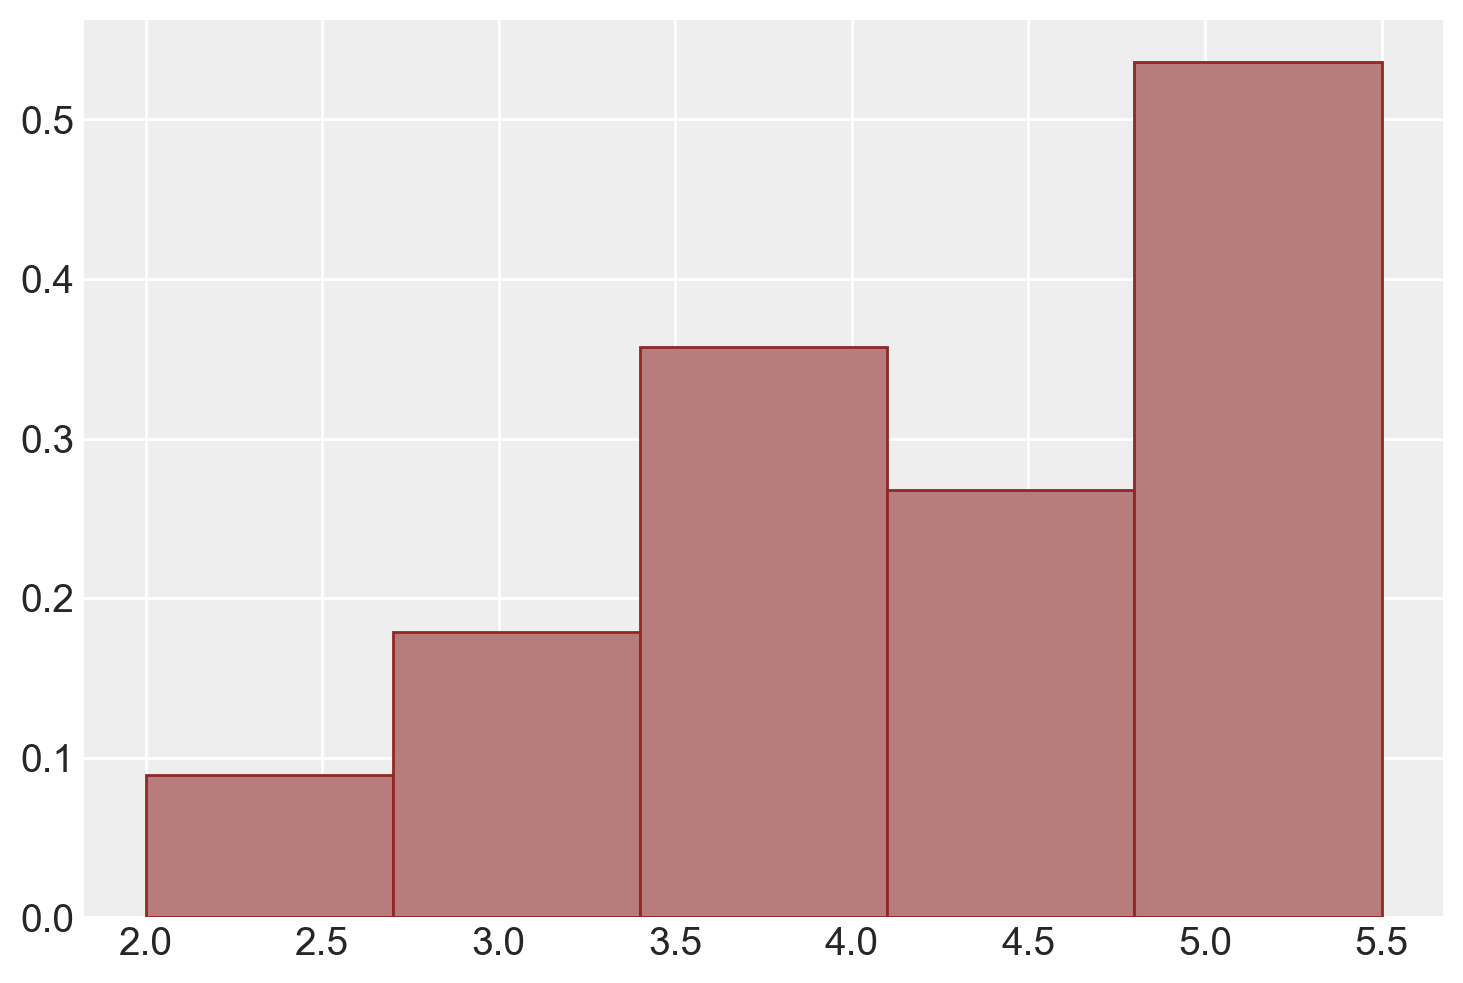

In [11]:
plt.hist(
    means,
    bins=5,
    density=True,
    color=color_fill,
    edgecolor=color_edge,
)
plt.show()

Mostriamo qui nuovamente la lista di tutti i possibili campioni di ampiezza 2 insieme alla media di ciascun campione.

In [12]:
df = pd.DataFrame()
df["Samples"] = list(itertools.product(x, x))
df["x_bar"] = np.mean(list(itertools.product(x, x)), axis=1)
df

,Samples,x_bar
0,"(2.0, 2.0)",2.00
1,"(2.0, 4.5)",3.25
2,"(2.0, 5.0)",3.50
3,"(2.0, 5.5)",3.75
4,"(4.5, 2.0)",3.25
5,"(4.5, 4.5)",4.50
6,"(4.5, 5.0)",4.75
7,"(4.5, 5.5)",5.00
8,"(5.0, 2.0)",3.50
9,"(5.0, 4.5)",4.75


Procediamo ora al calcolo della media della distribuzione campionaria delle medie di campioni di ampiezza $n$ = 2 che possono essere estratti dalla popolazione `x`. Sappiamo che, se la variabile aleatoria $X$ è distribuita con media $\mu$ e varianza $\sigma^2$, allora la media della distribuzione dei campioni casuali indipendenti di ampiezza $n$ = 2 sarà:

$$
\mathbb{E}(\bar{X}_n) = \frac{1}{n} \mathbb{E}(S_n) = \frac{1}{n} n \mu = \mu.
$$

Verifichiamo che ciò sia vero nel nostro caso specifico.

In [13]:
(np.mean(x), np.mean(means))

(4.25, 4.25)

Verifichiamo che la varianza della distribuzione dei campioni casuali indipendenti di ampiezza $n=2$ che possono essere estratti dalla popolazione $X$ con varianza $\sigma^2$ sia $\mathbb{V}(\bar{X})=\sigma^2/n$. 

Considerando la definizione di varianza, possiamo scrivere:

$$
\begin{aligned}
\mathbb{V}(\bar{X}) &= \mathbb{E}[(\bar{X}-\mu_{\bar{X}})^2] \\
&= \mathbb{E}[(\bar{X} - \mu)^2] \\
&= \mathbb{E}[(X_1+X_2)/2 - \mu)^2] \\
&= \mathbb{E}[((X_1 - \mu) + (X_2 - \mu))/2)^2] \\
&= \mathbb{E}[(X_1 - \mu)^2/4 + (X_2 - \mu)^2/4 + (X_1 - \mu)(X_2 - \mu)/2)] \\
&= \frac{1}{4}\mathbb{E}[(X_1 - \mu)^2] + \frac{1}{4}\mathbb{E}[(X_2 - \mu)^2] + \frac{1}{2}\mathbb{E}[(X_1 - \mu)(X_2 - \mu)] \\
&= \frac{1}{4}\mathbb{V}(X_1) + \frac{1}{4}\mathbb{V}(X_2) + \frac{1}{2}\mathbb{C}(X_1,X_2) \\
&= \frac{\sigma^2}{4} + \frac{\sigma^2}{4} + 0 \\
&= \frac{\sigma^2}{2}
\end{aligned}
$$

Dove $\mu_{\bar{X}}$ è la media della distribuzione campionaria delle medie di campioni di ampiezza $n=2$ e $\mathbb{C}(X_1,X_2)$ è la covarianza tra $X_1$ e $X_2$. In questo caso, dato che i campioni sono estratti in modo casuale e indipendente, la covarianza tra $X_1$ e $X_2$ è 0. Pertanto, abbiamo dimostrato che $\mathbb{V}(\bar{X})=\sigma^2/n$ per $n=2$.

Il valore teorico della varianza delle medie dei campioni è dunque pari a

In [12]:
np.var(x, ddof=0) / 2

0.90625

Lo stesso risultato si ottiene facendo la media delle 16 medie che abbiamo trovato in precedenza.

In [13]:
np.var(means, ddof=0) 

0.90625

Consideriamo ora un particolare campione. Per esempio

In [14]:
observed_sample = np.array([5, 5.5])
print(observed_sample)

[5.  5.5]


Troviamo la media del campione:

In [15]:
sample_mean = np.mean(observed_sample)
print(sample_mean)

5.25


La media del campione è diversa dalla media della popolazione ($\mu$ = 4.25).

Troviamo la deviazione standard del campione:

In [16]:
sample_sd = np.std(observed_sample, ddof=1)
print(sample_sd)

0.3535533905932738


La deviazione standard del campione è diversa dalla deviazione standard della popolazione:

In [17]:
np.std(x, ddof=0)

1.346291201783626

In conclusione, si presti attenzione a due aspetti importanti:

- la media della distribuzione delle medie campionarie è uguale alla media della popolazione,
- la varianza della distribuzione delle medie campionarie è minore della varianza della popolazione, ovvero è pari alla varianza della popolazione divisa per l'ampiezza campionaria.

Questi due risultati che abbiamo ottenuto empiricamente nella simulazione possono essere espressi in maniera formale dicendo che la media di campioni casuali estratti con ripetizione da una popolazione finita (oppure da una popolazione infinita) di media $\mu$ e varianza $\sigma^2$ ha valore atteso
$
\mathbb{E}(\bar{X}_n) = \mu
$
e varianza
$
\mathbb{V}(\bar{X}_n) = \frac{\sigma^2}{n}.
$

Inoltre, se la popolazione segue una distribuzione normale, allora per le proprietà della distribuzione normale, anche la distribuzione delle medie dei campioni seguirà una distribuzione normale. Al contrario, se la popolazione non segue una distribuzione normale, il teorema del limite centrale garantisce che, all'aumentare delle dimensioni del campione, la distribuzione delle medie dei campioni tenderà a una distribuzione normale.

## Teorema del Limite Centrale

Esaminiamo ora più in dettaglio il Teorema del Limite Centrale (TLC). Nel 1812, Laplace dimostrò il TLC, che afferma che la somma di una sequenza di variabili casuali indipendenti tende a distribuirsi secondo una distribuzione Normale. Inoltre, il TLC stabilisce i parametri della distribuzione Normale risultante in base ai valori attesi e alle varianze delle variabili casuali sommate.

::: {#thm-}
Si supponga che $Y = Y_1, \dots, Y_i, \ldots, Y_n$ sia una sequenza di v.a. i.i.d. (variabili aleatorie identicamente distribuite e indipendenti) con $\mathbb{E}(Y_i) = \mu$ e $SD(Y_i) = \sigma$. Si definisca una nuova variabile casuale come:

$$
Z = \frac{1}{n} \sum_{i=1}^n Y_i.
$$

Con $n \rightarrow \infty$, $Z$ tenderà a seguire una distribuzione Normale con lo stesso valore atteso di $Y_i$ e una deviazione standard ridotta di un fattore pari a $\frac{1}{\sqrt{n}}$:

$$
p_Z(z) \rightarrow \mathcal{N}\left(z \ \Bigg| \ \mu, \, \frac{\sigma}{\sqrt{n}} \right).
$$
:::

Il TLC può essere generalizzato a variabili casuali che non sono identicamente distribuite, a condizione che siano indipendenti e abbiano aspettative e varianze finite. Molti fenomeni naturali, come l'altezza degli adulti, sono il risultato di una combinazione di effetti additivi relativamente piccoli. Questi effetti, indipendentemente dalla loro distribuzione individuale, tendono a portare alla normalità della distribuzione risultante. Questa è la ragione per cui la distribuzione normale fornisce una buona approssimazione per la distribuzione di molti fenomeni naturali.

Per illustrare il TLC, utilizziamo una simulazione. Consideriamo una popolazione iniziale fortemente asimmetrica, come una distribuzione Beta(2, 1). Estraiamo da questa popolazione 50,000 campioni di ampiezza $n$ e costruiamo la distribuzione campionaria di tali campioni.

In [18]:
# parameters of the beta
a=2
b=1

def plotSamples(n):
    # create normal distribution with mean and standard deviation of the beta
    mu = a / (a+b)
    sigma = math.sqrt( a*b / (a+b)**2 / (a+b+1) )
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma/math.sqrt(n))

    # find sample means from samples of "ramped" beta distribution
    values = []
    for i in range(n):
        v = []
        for j in range(50000):
          v.append(np.random.beta(a,b))
        values.append(v)
    df = pd.DataFrame(values)
    sample_means = df.mean(axis=0)

    # plot a histogram of the distribution of sample means, together 
    # with the population distribution
    fig, ax = plt.subplots(sharex=True)
    sns.histplot(sample_means)
    ax2 = ax.twinx()
    sns.lineplot(x=x,y=y, ax=ax2, color='black')
    ax.set(yticklabels=[])
    ax2.set(yticklabels=[])
    ax.set(ylabel=None)
    ax2.set(ylabel=None)
    ax.tick_params(left=False)
    ax2.tick_params(right=False)
    ax.set_title("Ampiezza campionaria = " + str(n))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)


Se l'ampiezza campionaria è 1, allora la ditribuzione campionaria delle medie coincide con la popolazione.

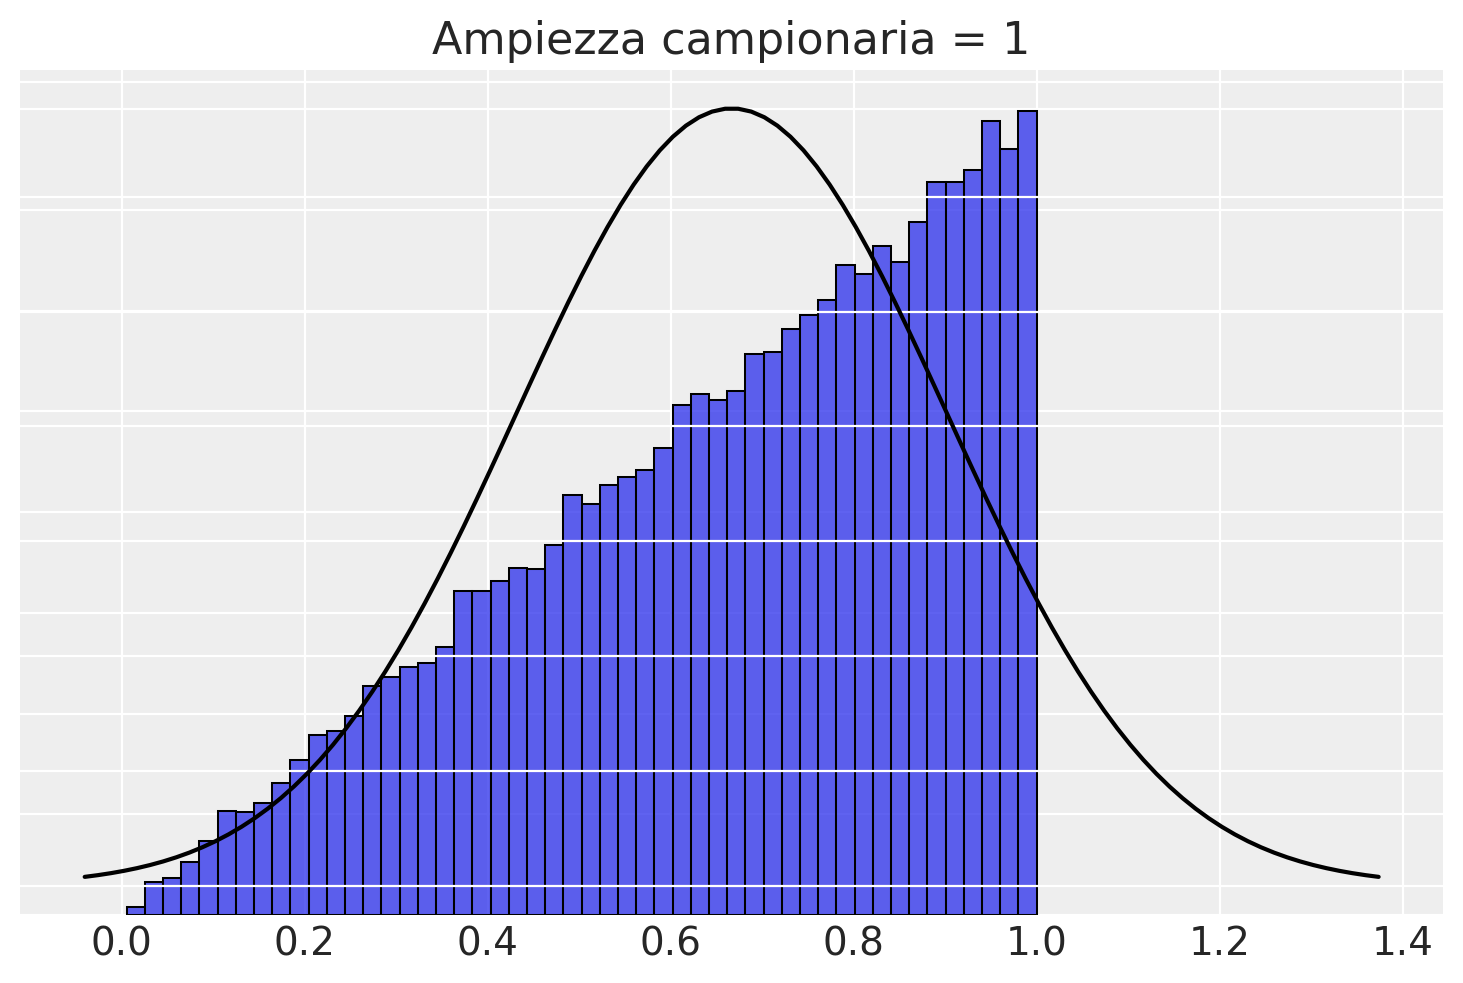

In [19]:
plotSamples(1)

Con $n$ = 2, la distribuzione delle medie dei campioni non è certamente Normale, inizia ad avvicinarsi alla gaussianità.

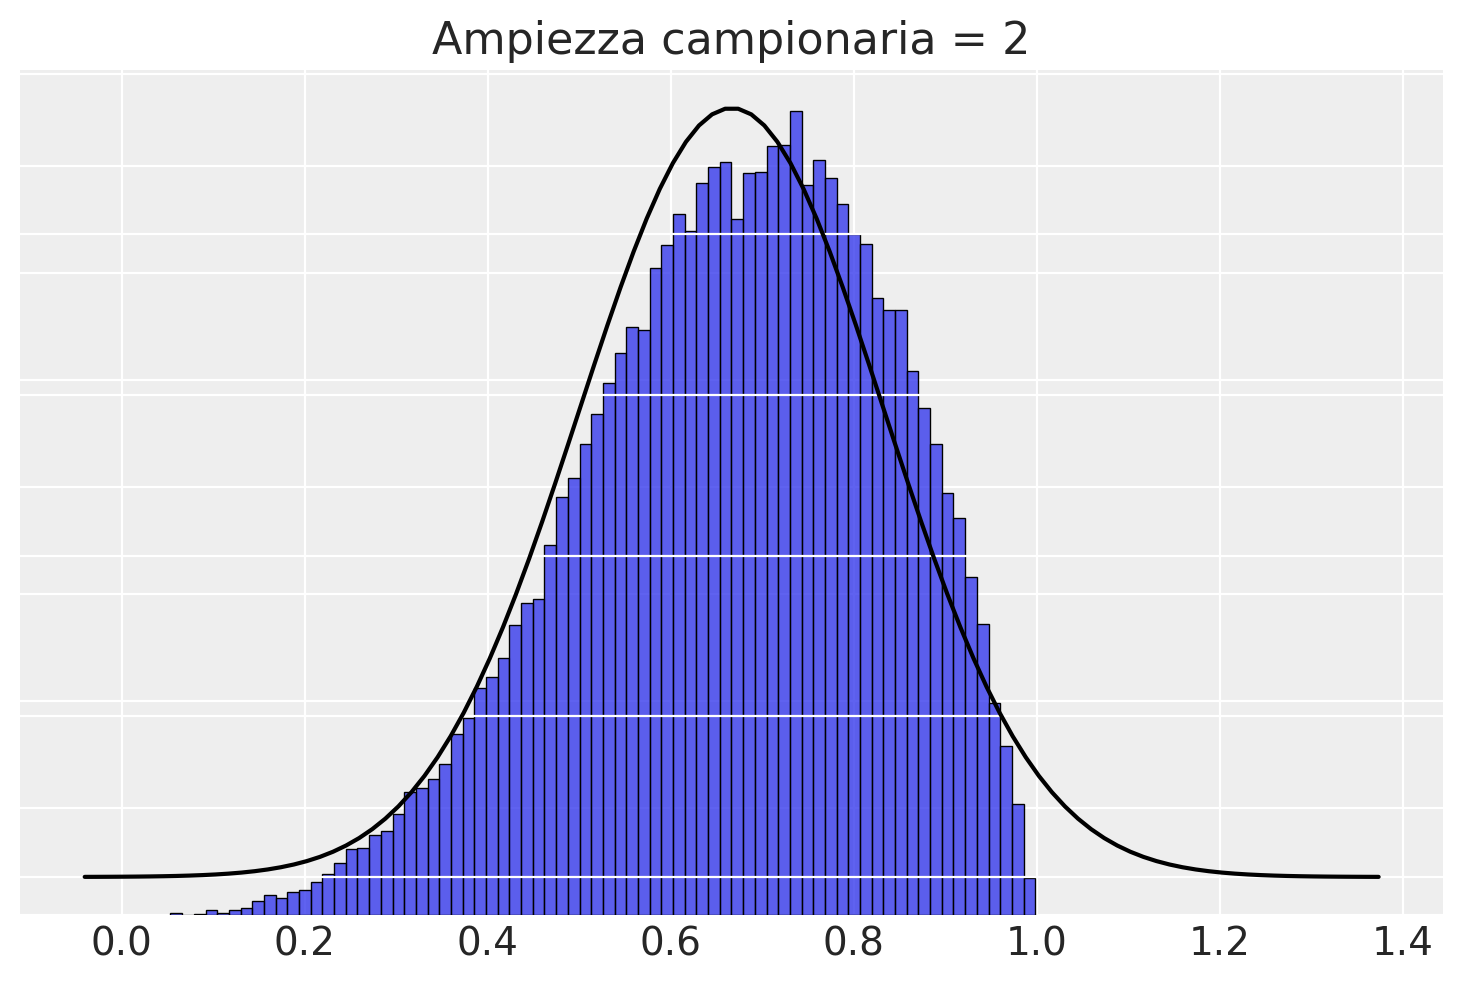

In [20]:
plotSamples(2)

Con $n$ = 4 c'è ancora una grande differenza tra la distribuzione campionaria delle medie dei campioni e la distribuzione normale, ma l'approssimazione migliora.

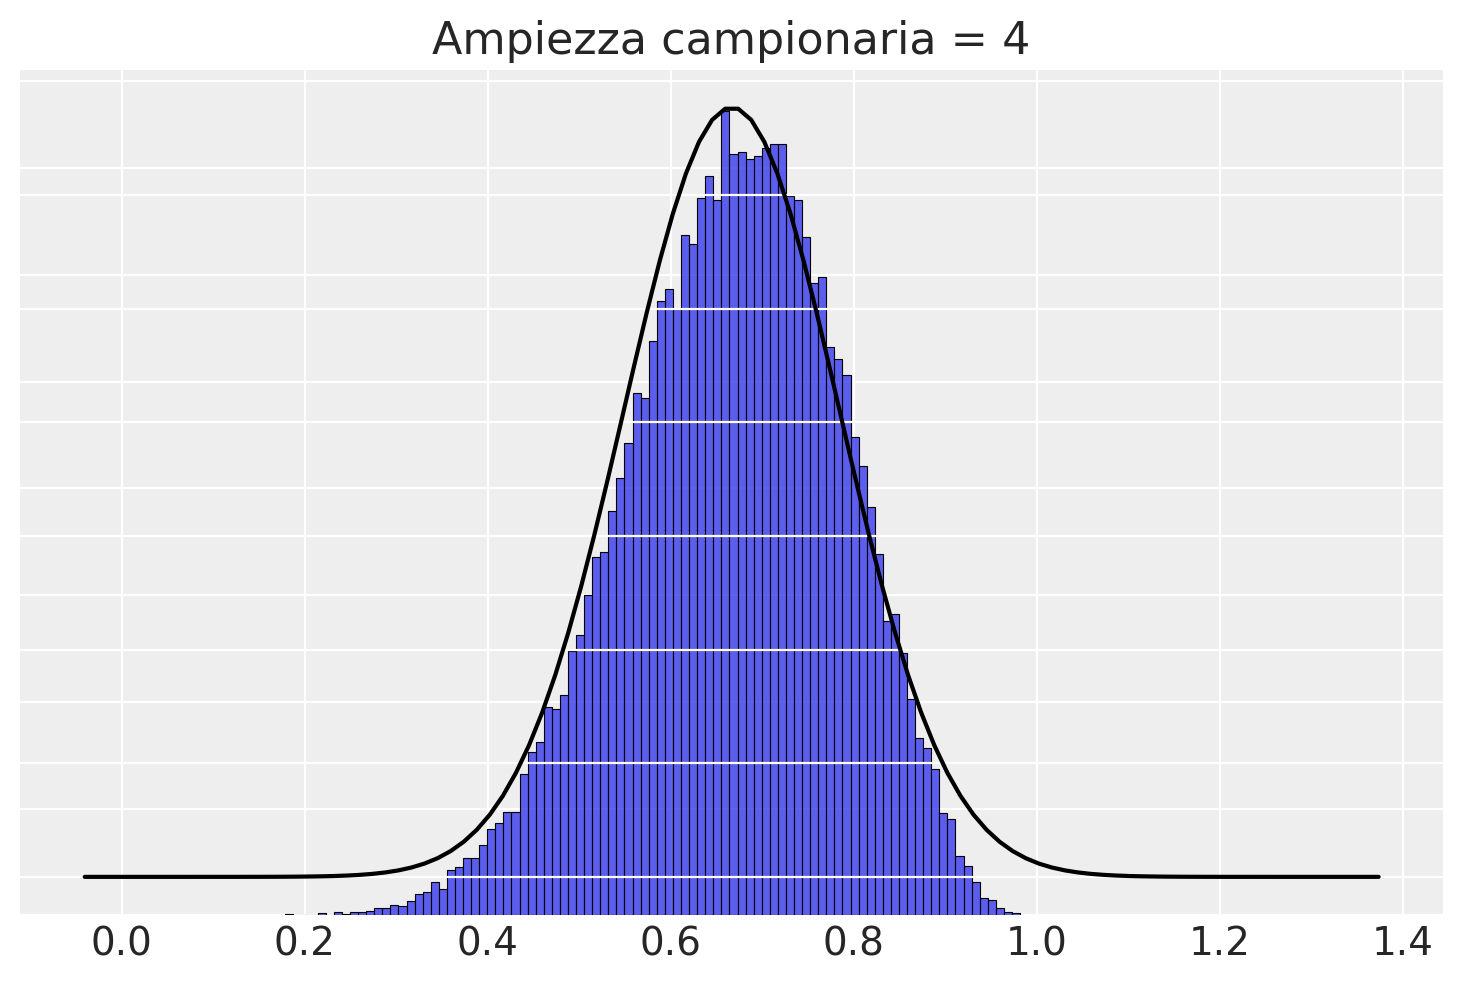

In [21]:
plotSamples(4)

Con $n$ = 30 la funzione $\mathcal{N}(100, 15/\sqrt{50})$ fornisce una buona approssimazione alla distribuzione campionaria delle medie dei campioni.

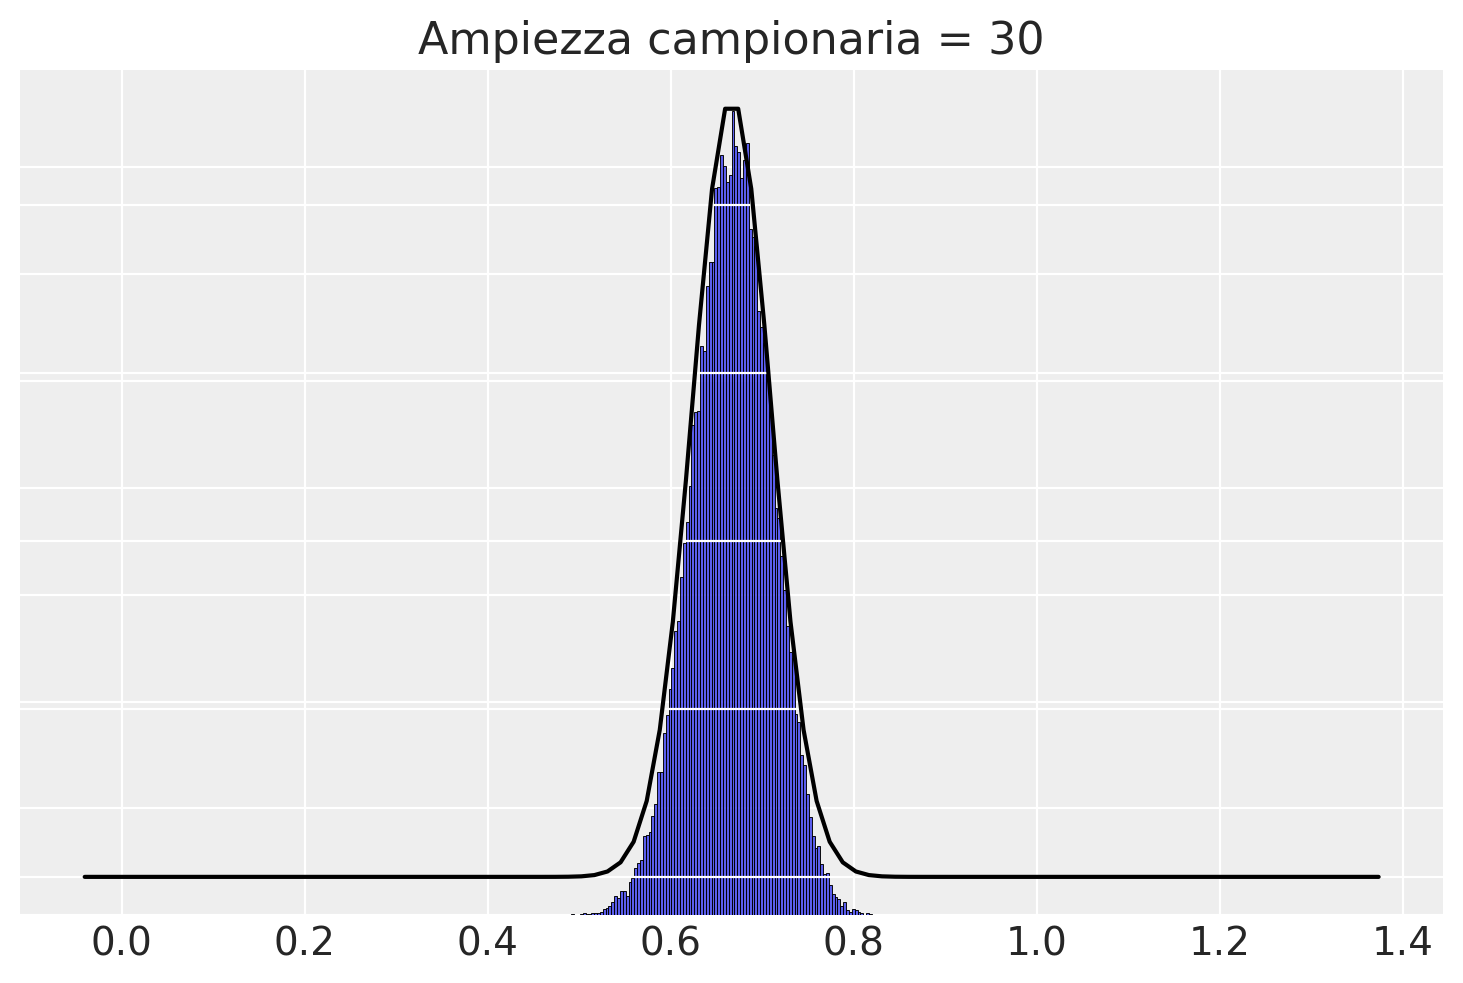

In [22]:
plotSamples(30)

In conclusione, il teorema del limite centrale (TLC) mostra che, salvo per campioni molto piccoli, la distribuzione campionaria della media dei campioni può essere ben approssimata dalla Normale, indipendentemente dalla forma della distribuzione della popolazione. Ciò significa che, per campioni sufficientemente grandi, il TLC ci fornisce una formula esplicita per la forma della distribuzione campionaria della media dei campioni, anche in assenza di conoscenze sulla popolazione di media $\mu$ e deviazione standard $\sigma$: $\bar{X} \sim \mathcal{N}(\mu, \sigma/\sqrt{n})$.

Il risultato del TLC ha una grande utilità in molti ambiti. Infatti, ci aiuta a comprendere perché i risultati degli esperimenti con un grande numero di osservazioni sono più affidabili rispetto a quelli con un numero ridotto di osservazioni. Inoltre, il TLC ci fornisce una formula esplicita per l'errore standard ($\sigma/\sqrt{n}$), che ci consente di valutare l'affidabilità degli esperimenti al variare della dimensione del campione. 

Negli esperimenti psicologici, molti dei fenomeni che vogliamo misurare sono in realtà medie di molteplici variabili (ad esempio, l'intelligenza "generale" misurata dal QI è una media di un gran numero di abilità specifiche), e in questi casi la quantità media segue una distribuzione normale. Questa legge matematica ci permette di osservare spesso la distribuzione normale nei dati degli esperimenti psicologici e in molte altre discipline scientifiche.

## Distribuzioni campionarie di altre statistiche

In precedenza abbiamo descritto la distribuzione campionaria della media dei campioni. Ma ovviamente è possibile costruire la distribuzione campionaria di altre statistiche campionarie.  Ad esempio, la figura seguente mostra l'approssimazione empirica della distribuzione campionaria del valore massimo del campione. È chiaro che, se da ciascun campione estraiamo il valore massimo, il valore atteso della distribuzione campionaria di questa statistica sarà maggiore della media della popolazione.

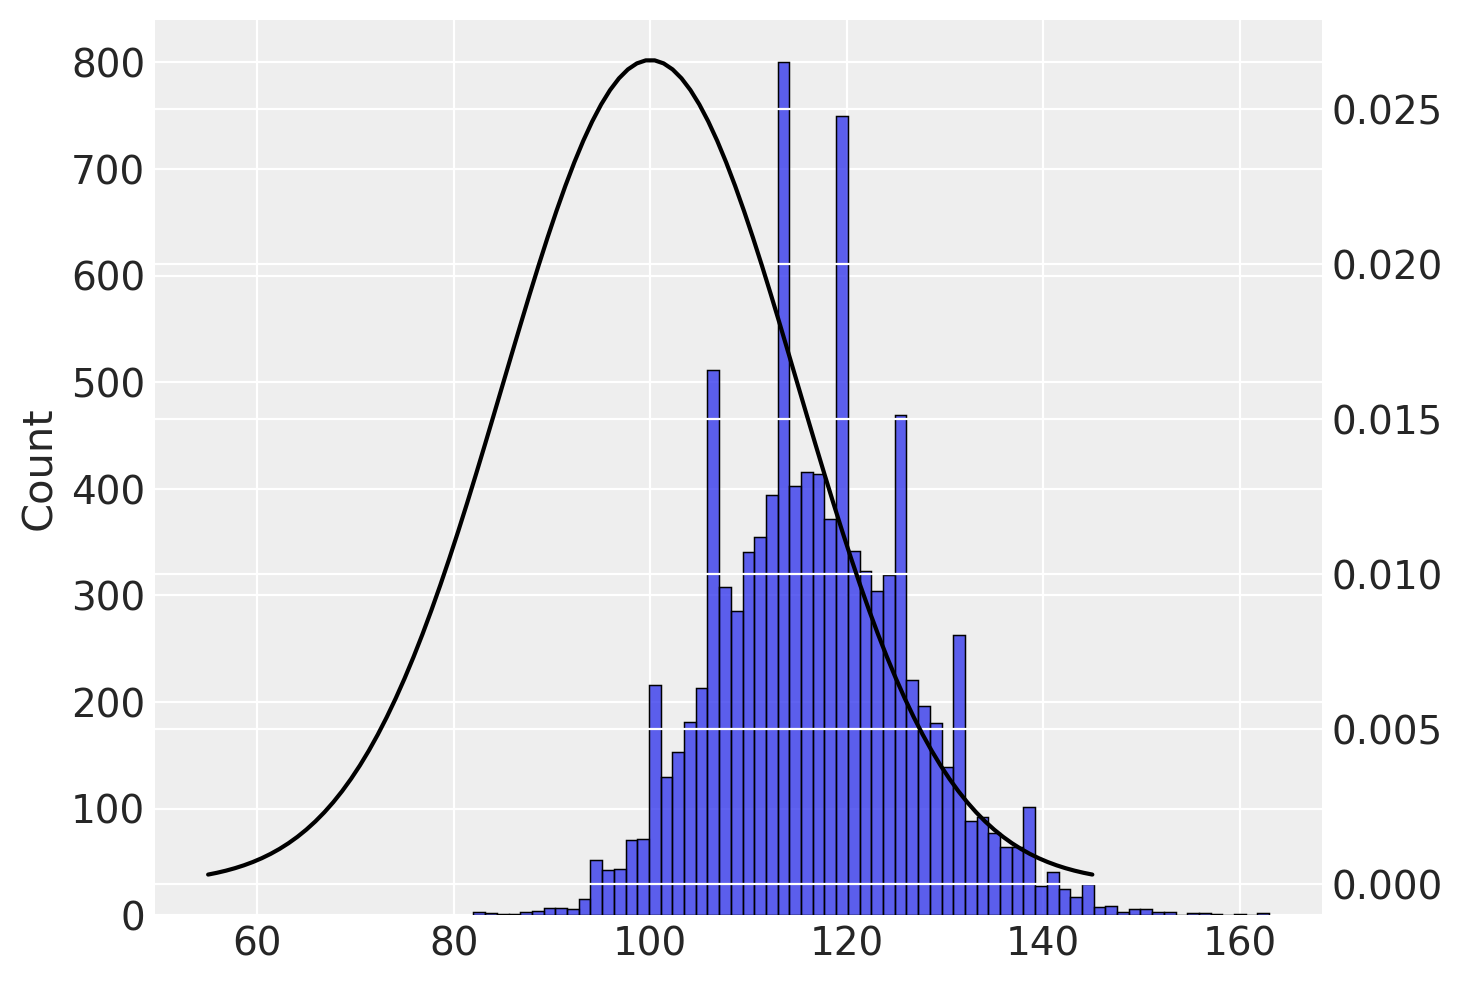

In [23]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find the maximum score for each experiment
sample_maxes = []
for i in range(1, 10000):
    sample_max = max(np.random.normal(loc=100, scale=15, size=5).astype(int))
    sample_maxes.append(sample_max)

# plot a histogram of the distribution of sample maximums, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_maxes, ax=ax)
ax2 = ax.twinx()
_ = sns.lineplot(x=x, y=y, ax=ax2, color="black")

La distribuzione campionaria della varianza dei campioni è particolarmente interessante. Per calcolare la varianza, iniziamo usando la formula della statistica descrittiva, ovvero

$$
S^2 = \frac{\sum_{i=1}^n (Y_i - \bar{Y})^2}{n}.
$$

Creiamo ora un grafico che rappresenta l'approssimazione empirica della distribuzione campionaria della varianza dei punteggi del quoziente di intelligenza, usando la procedura descritta in precedenza. 

Sappiamo che la varianza della popolazione è uguale a $15^2 = 225$. Tuttavia, calcolando la varianza con la formula della statistica descrittiva otteniamo, in media, un valore minore. Dunque, l'utilizzo della formula precedente conduce a una stima troppo piccola della varianza della popolazione. Gli statistici chiamano questa discrepanza *distorsione*, ovvero quando il valore atteso di uno stimatore non coincide con il parametro.

176.76365773544788

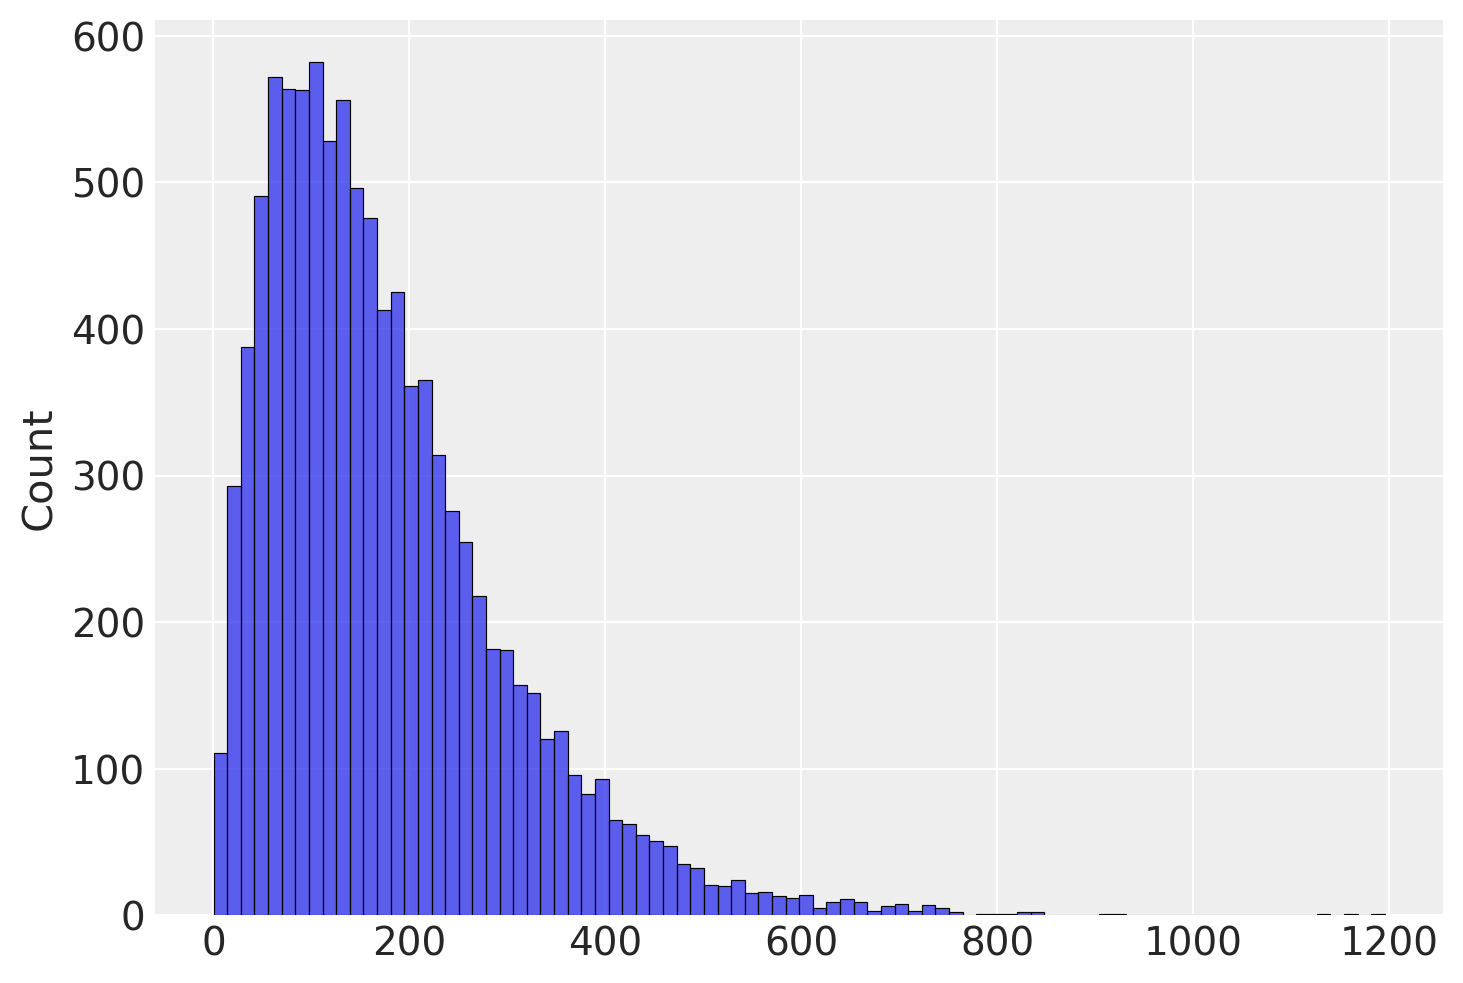

In [24]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5))
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

Questa dimostrazione ci fa dunque capire come 

$$
S^2 = \frac{\sum_{i=1}^n (Y_i - \bar{Y})^2}{n}.
$$

non sia uno stimatore adeguato per la varianza della popolazione.

Abbiamo già visto però che questo problema trova una semplice soluzione nel momento in cui usiamo usiamo il seguente stimatore per la varianza della popolazione:

$$
s^2 = \frac{\sum_{i=1}^n (Y_i - \bar{Y})^2}{n-1}.
$$

Verifichiamo.

224.19924816630638

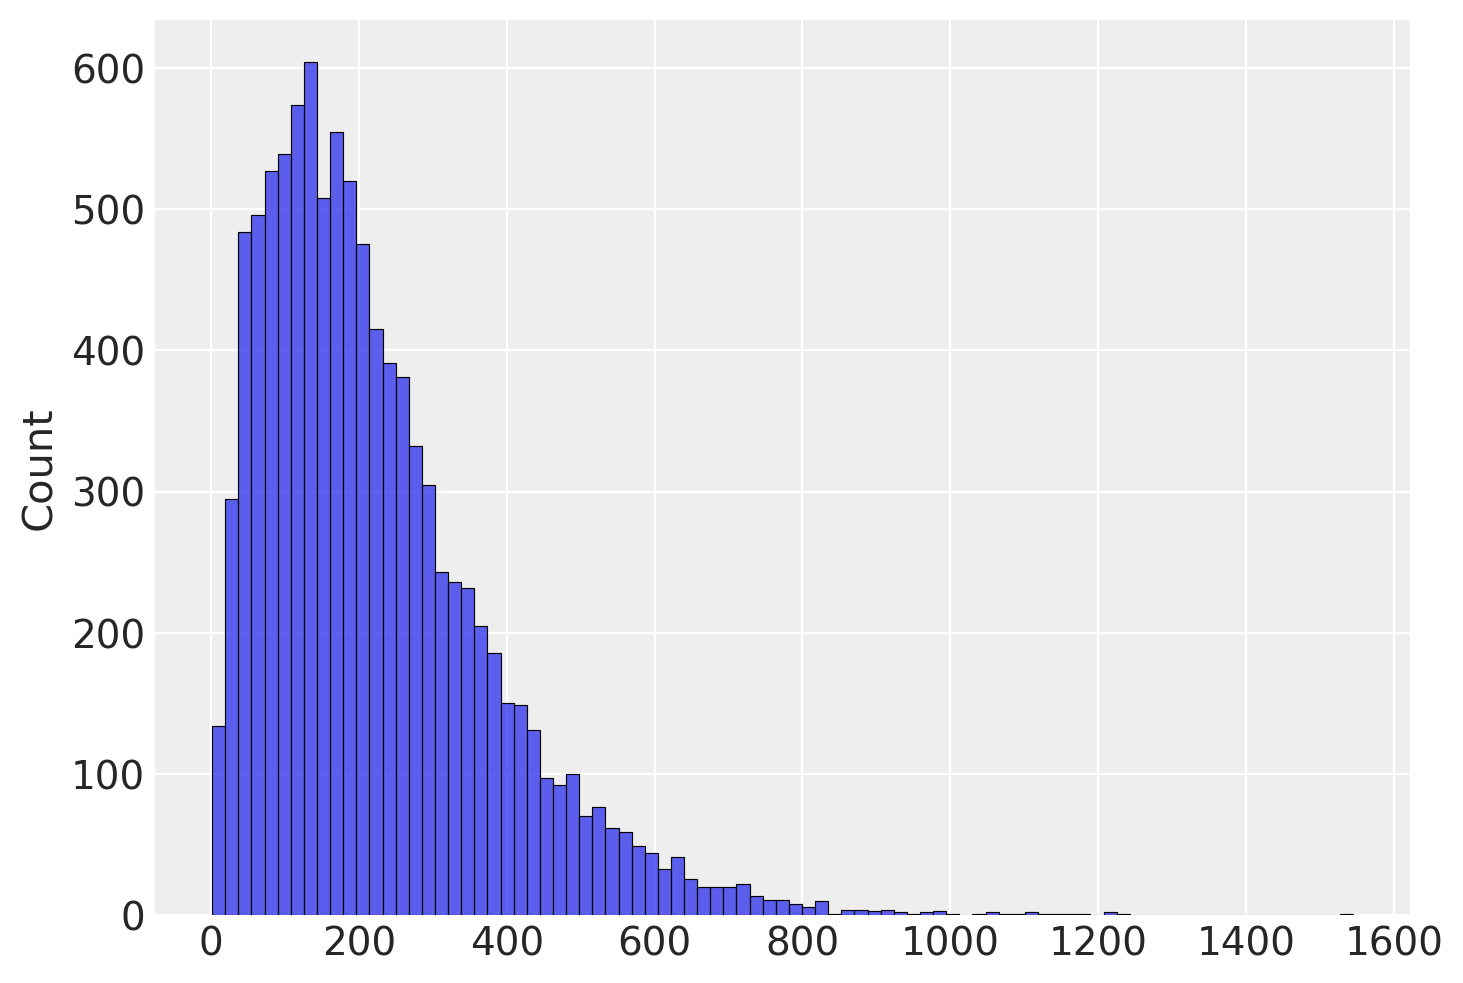

In [25]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5), ddof=1)
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

La discrepanza tra la stima di un parametro e il suo vero valore è definita come *errore di stima*. Uno stimatore è considerato *non distorto* (*unbiased*) se, in media, le sue stime su diversi campioni ipotetici coincidono con il valore del parametro che si intende stimare, ossia se l'errore medio di stima è nullo.

Nel corso di questo capitolo, abbiamo osservato che $\frac{\sum_{i=1}^n{X_i}}{n}$ costituisce uno stimatore non distorto di $\mu$, mentre $\frac{\sum_{i=1}^n{(X_i - \bar{X})^2}}{n-1}$ è uno stimatore non distorto di $\sigma^2$. Questo implica che lo stimatore $\frac{\sum_{i=1}^n{(X_i - \bar{X})^2}}{n-1}$ presenta una distribuzione campionaria centrata sul vero valore del parametro $\sigma^2$.

## Considerazioni conclusive

In generale, i parametri della popolazione sono sconosciuti, ma possiamo stimarli utilizzando le informazioni del campione. Di seguito viene presentata una tabella che riassume i simboli comuni utilizzati per indicare le quantità note e sconosciute nel contesto dell'inferenza statistica. Questo ci aiuterà a tenere traccia di ciò che sappiamo e ciò che non sappiamo.

|Simbolo          | Nome           | È qualcosa che conosciamo?     |
|:----------------|:-------------|:--------------------|
|$s$              |Deviazione standard del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma$         |Deviazione standard della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}$  | Stima della deviazione standard della popolazione | Sì, ma non è uguale a $\sigma$ |
|$s^2$            | Varianza del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma^2$       | Varianza della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}^2$ | Stima della varianza della popolazione  | Sì, ma non è uguale a $\sigma^2$  |

Utilizzando le informazioni di un campione casuale di ampiezza $n$:

- La stima migliore che possiamo ottenere per la media $\mu$ della popolazione è la media del campione $\bar{Y}$.
- La stima migliore che possiamo ottenere per la varianza $\sigma^2$ della popolazione è:

$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2.
$$

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [26]:
%load_ext watermark
%watermark -n -u -v -iv 

Last updated: Thu Jun 13 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

seaborn   : 0.13.2
arviz     : 0.18.0
numpy     : 1.26.4
matplotlib: 3.8.4
pandas    : 2.2.2
scipy     : 1.13.1

